In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reset des TensorFlows
tf.reset_default_graph() 

# Daten laden und eigene Definitionen

In [2]:
data = pd.read_csv('data_train.csv')
input_X = data[['x0', 'x1']]
input_y = data.y

data_test = pd.read_csv('data_test.csv')
test_X = data_test[['x0', 'x1']]
test_y = data_test.y

Damit unser Modell schneller lernt, teilen wir unseren Datensatz in Stapel ein. Dafür erstellen wir eine Funktion, welche unseren Datensatz in Stapel teilt!

<img src="Stapel.png"/>

Je nach Datensatz und Modell empfehlt sich eine andere Stapelgröße. 

In [3]:
def stapel_erstellen(X, Y, stapel_grosse, p_index):
    return X[stapel_grosse * p_index: stapel_grosse * (p_index + 1)], Y[stapel_grosse * p_index: stapel_grosse * (p_index + 1)]

# Erstellen des Graphen
## Formen der Tensoren

In [4]:
# Anzahl der Ergebnissspalten
anz_unit = 1
# Anzahl der Eingänge bzw. Merkmale 
anz_ein = 2
# Anzahl der Ausgänge
anz_aus = 1

## Parameter zur Steuerung des Graphen
Die richtige Wahl der Parameter zur Steuerung des Graphen sind entscheidend, wenn es darum geht, wie schnell ein Modell lernt. Wenn wir zum Beispiel `anz_stapel=10` statt `anz_stapel=5` nutzen, dann brauch unser Modell länger um eine Genauigkeit von 100 % zu erreichen, wenn überhaupt. 

In [5]:
# Lernrate
eta = 0.1
# Anzahl der der Pakete mit den zu analysierenden Datenwerte
anz_stapel = 5
# Anzahl der zu analysierenden Datenwerte
stapel_grosse = int(len(input_X)/anz_stapel)
# Anzahl der Wiederholungen
epochen = 50

## Relevante Größen

In [6]:
# Eingangssignal
x = tf.placeholder(tf.float32, shape=[None, anz_ein],name='Input')  # Stapelgröße(k) x 2
# Ausgangssignal
y_true = tf.placeholder(tf.float32, shape=None, name='Labels')  # Stapelgröße(k) x 1
# Gewichte
w = tf.Variable(tf.random_normal([anz_ein, anz_unit]), name='Weights')  # 2x1

## Berechnungsgleichungen
In der Theorie sind wir immer nur einen Datenpunkt in Betracht gezogen. In TensorFlow wollen wir jedoch einen Stapel betrachten. Dadurch ändert sich die Berechnung ein wenig. Wir berechnen für alle Punkte eine Fehlerfunktion. Der Mittelwert aller Fehlerfunktionen, die Kostenfunktion, soll dann optimiert werden.

<img src="stapel-epoche.png"/>

In [7]:
# z = xw
z = tf.matmul(x, w, name='Z')
# H = y * -log(sigmoid(z)) + (1 - y) * -log(1 - sigmoid(z)) -> Kreuzentropie
err = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=z),name='Costfunction')
# Minimieren der Fehlerfunktion
opt = tf.train.GradientDescentOptimizer(learning_rate=eta).minimize(err)

# Berechnung der Genauigkeit
eins = tf.reshape(tf.round(tf.sigmoid(z)),[len(test_X), 1])
zwei = tf.reshape(y_true,[len(test_X), 1])
acc = tf.equal(eins, zwei)
acc = tf.reduce_mean(tf.cast(acc, tf.float32), name='Accuracy')

# Ausführung des Graphen
Bei der Ausführung ist es wichtig, dass wir die Variablen initialisieren. Auch ist es vorteilhaft, wenn wir die Session mit `with` starten.

In [8]:
# Größen zur späteren Datenvisualisierung
W_set = []
Err_set = []
Acc_set = []
# Initialisierung der Variablen
init = tf.global_variables_initializer()
# Ausführung des Graphen
with tf.Session() as sess:
    # Wichtig für TensorBoard
    writer = tf.summary.FileWriter('./graphs/perceptron', sess.graph)
    sess.run(init)
    # Schleife für Epoche
    for e in range(epochen):
        # Schleife für Stapel
        for i in range(anz_stapel):
            # Einteilen unserer Daten in Stapel
            stapel_x, stapel_y = stapel_erstellen(X=input_X,
                                                  Y=input_y,
                                                  stapel_grosse=stapel_grosse,
                                                  p_index=i)
            # Ausführung der Berechnung
            Z, W, _, Err = sess.run([z, w, opt, err],
                                    feed_dict={x: stapel_x, y_true: stapel_y})

        # Datenspeicherung für Visualisierung über die Epochen
        W_set.append(W)
        Err_set.append(np.mean(Err))
        Acc = sess.run([acc],
                       feed_dict={x: test_X, y_true: test_y})
        Acc_set.append(Acc)
        print('{:}. Epoche Genauigkeit: {:.2f} %'.format(e, Acc[0]*100))
    sess.close()

0. Epoche Genauigkeit: 50.75 %
1. Epoche Genauigkeit: 65.00 %
2. Epoche Genauigkeit: 80.75 %
3. Epoche Genauigkeit: 93.00 %
4. Epoche Genauigkeit: 97.75 %
5. Epoche Genauigkeit: 98.75 %
6. Epoche Genauigkeit: 99.75 %
7. Epoche Genauigkeit: 100.00 %
8. Epoche Genauigkeit: 100.00 %
9. Epoche Genauigkeit: 100.00 %
10. Epoche Genauigkeit: 100.00 %
11. Epoche Genauigkeit: 100.00 %
12. Epoche Genauigkeit: 100.00 %
13. Epoche Genauigkeit: 100.00 %
14. Epoche Genauigkeit: 100.00 %
15. Epoche Genauigkeit: 100.00 %
16. Epoche Genauigkeit: 100.00 %
17. Epoche Genauigkeit: 100.00 %
18. Epoche Genauigkeit: 100.00 %
19. Epoche Genauigkeit: 100.00 %
20. Epoche Genauigkeit: 100.00 %
21. Epoche Genauigkeit: 100.00 %
22. Epoche Genauigkeit: 100.00 %
23. Epoche Genauigkeit: 100.00 %
24. Epoche Genauigkeit: 100.00 %
25. Epoche Genauigkeit: 100.00 %
26. Epoche Genauigkeit: 100.00 %
27. Epoche Genauigkeit: 100.00 %
28. Epoche Genauigkeit: 100.00 %
29. Epoche Genauigkeit: 100.00 %
30. Epoche Genauigkeit: 100

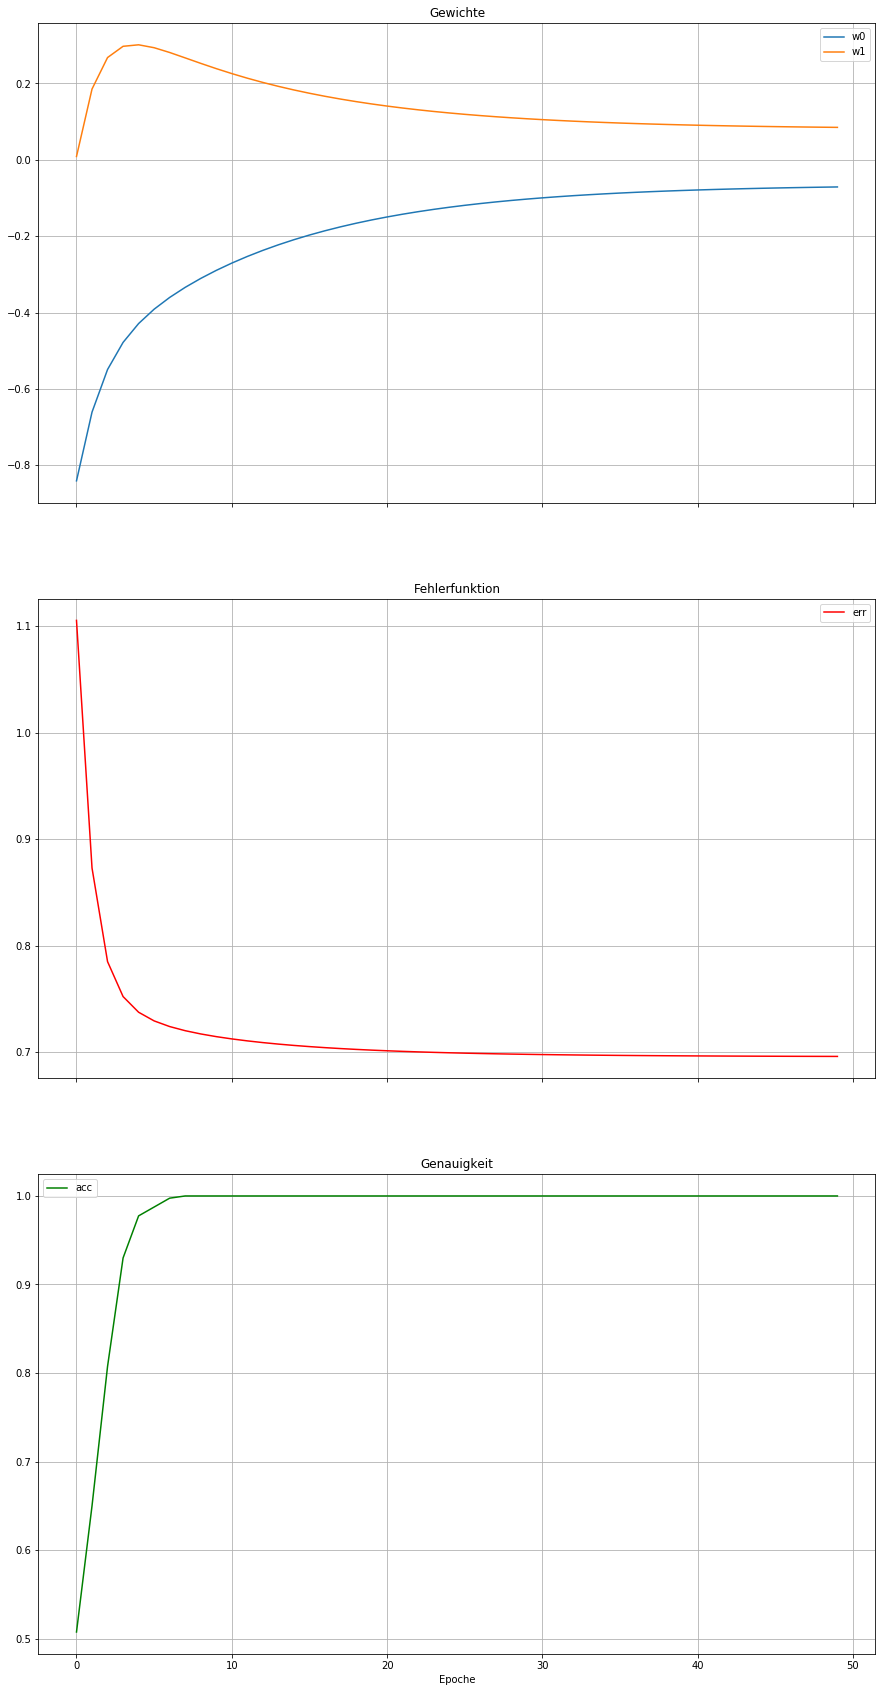

In [9]:
w_0, w_1 = zip(*W_set)
fig, ax = plt.subplots(3,1, figsize=(15,30), sharex='all')
ax[0].plot(range(len(W_set)), w_0, label='w0')
ax[0].plot(range(len(W_set)), w_1, label='w1')
ax[0].legend()
ax[0].grid()
ax[0].set_title('Gewichte')

ax[1].plot(range(len(W_set)), Err_set, c='r', label='err')
ax[1].legend()
ax[1].set_title('Fehlerfunktion')
ax[1].grid()

ax[2].plot(range(len(W_set)), Acc_set, c='g', label='acc')
ax[2].legend()
ax[2].set_title('Genauigkeit')
ax[2].set_xlabel('Epoche')
ax[2].grid()

# Zusammenfassung
Nun haben wir unser Perzeptron erfolgreich mit TensorFlow realisiert. Um ein Gefühl zu bekommen, könnt ihr gerne mit den "Parameter zur Steuerung des Graphen" herumexperimentieren. Je nach Auswahl der Parameter ändert sich die Optimierung und sogar die Genauigkeit unseres Modells. Bei so einfachen Daten, sollte unser Modell definitiv 100% Genauigkeit erreichen. Dies ist jedoch nur möglich, wenn wir die richtigen Parameter wählen. Probiert es also einfach mal aus.